In [1]:
!pip install qiskit
!pip install qiskit.ignis
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

import numpy as np
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

<ipython-input-2-94a14b0032a4>:8: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification import marginal_counts


#Teleportation Circuit

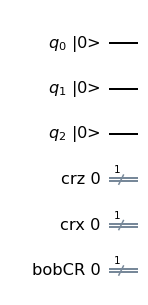

In [3]:
#Quantum Register

qr= QuantumRegister(3, name='q')

crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
bobCR = ClassicalRegister(1, name='bobCR')

teleportation_circuit = QuantumCircuit(qr, crz, crx, bobCR)

teleportation_circuit.draw(initial_state=True, output='mpl')

#Create Random State

<IPython.core.display.Latex object>

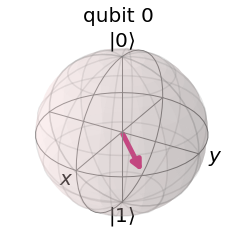

In [4]:
psi = random_statevector(2)

display(array_to_latex(psi))

init_gate = Initialize(psi)
init_gate.label = 'psi'

plot_bloch_multivector(psi)

#Assign to Alice qubit

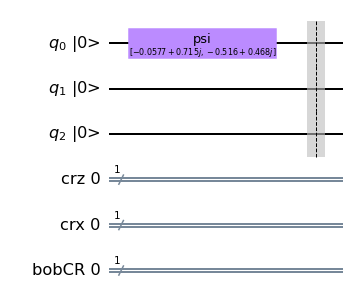

In [5]:
teleportation_circuit.append(init_gate, [0])

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')

#Entangled Pair

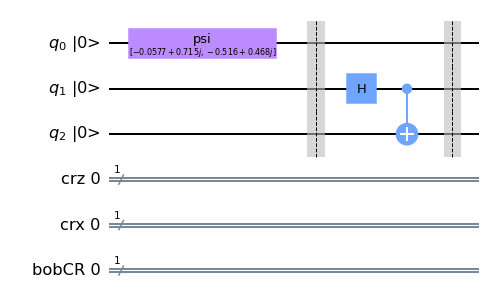

In [6]:
#Entangled Pair

teleportation_circuit.h(1)
teleportation_circuit.cx(1, 2)
teleportation_circuit.barrier()
teleportation_circuit.draw(initial_state=True, output='mpl')



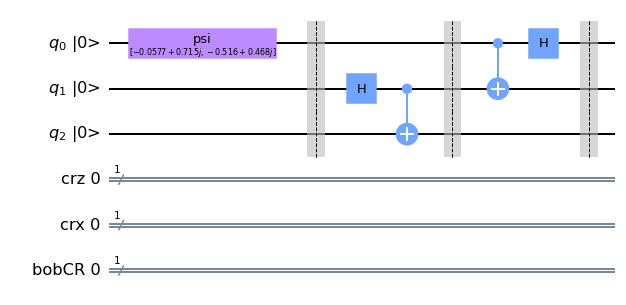

In [7]:
teleportation_circuit.cx(0, 1)

teleportation_circuit.h(0) 

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state = True, output='mpl')

#Create a copy of circuit

In [8]:
import copy

second_teleportation_circuit = copy.deepcopy(teleportation_circuit)

#Alice applies measurement

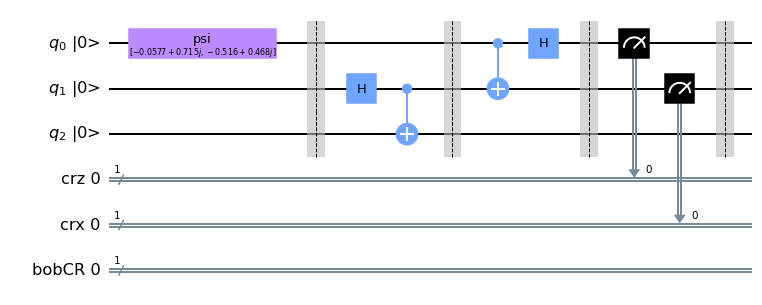

In [9]:
teleportation_circuit.measure(0, crz)

teleportation_circuit.measure(1, crx)

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state = True, output='mpl')


#crz crx
#00 ---- > Do Nthing
#01 ---- > Apply X Gate
#10 ---- > Apply Z Gate
#11 ---- > Apply both X and Z gate

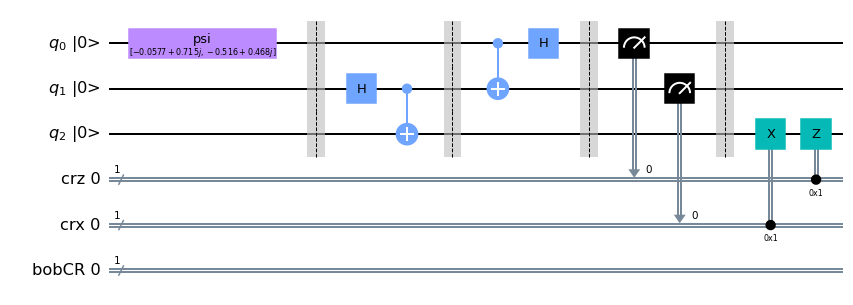

In [10]:
teleportation_circuit.x(2).c_if(crx, 1)

teleportation_circuit.z(2).c_if(crz, 1)

teleportation_circuit.draw(initial_state=True, output='mpl')

#Simulator

In [11]:
#select simulator
#simulator = Aer.get_backend('aer_simulator')

#save statevectr
#teleportation_circuit.save_statevector()

#assemble
#qobj = assemble(teleportation_circuit)

#run
#job = simulator.run(teleportation_circuit)

#job monitor
#job_monitor(job)

#get result
#result = job.result()

#Statevector

In [12]:
#plot_bloch_multivector(result.get_statevector())

#Inverse

In [13]:
inverse_init_gate = init_gate.gates_to_uncompute()

#Append to Bob's Qubit

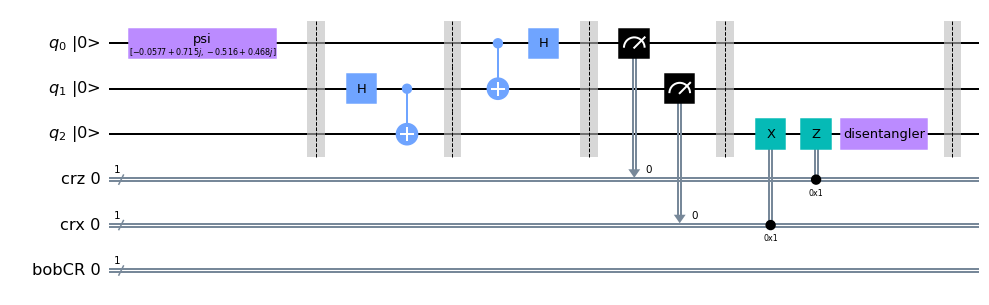

In [14]:
teleportation_circuit.append(inverse_init_gate,[2])

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True,output='mpl')

#Measure BOB quibit

In [15]:
teleportation_circuit.measure(2, bobCR)


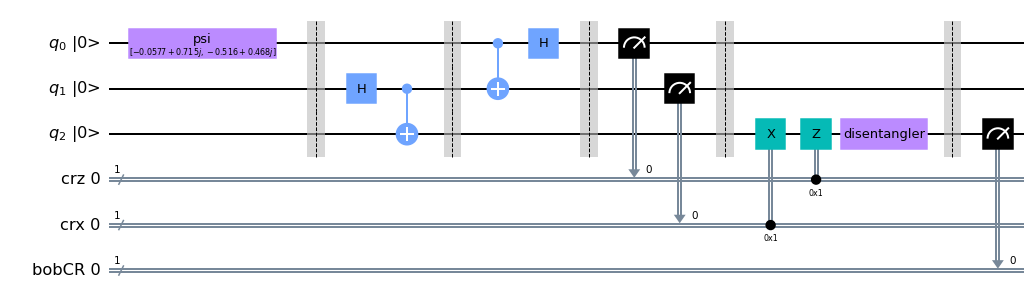

In [16]:
teleportation_circuit.draw(initial_state=True,output='mpl')

#Run on simulator

In [17]:
#select simulator
simulator = Aer.get_backend('aer_simulator')

t= transpile(teleportation_circuit, simulator)

#save statevectr
t.save_statevector()

#assemble
qobj = assemble(t)

#run
job = simulator.run(qobj)

#job monitor
job_monitor(job)

#get result
result = job.result()

Job Status: job has successfully run


#Result

In [18]:
counts = result.get_counts()
print (counts)

{'0 0 1': 242, '0 1 1': 274, '0 0 0': 261, '0 1 0': 247}


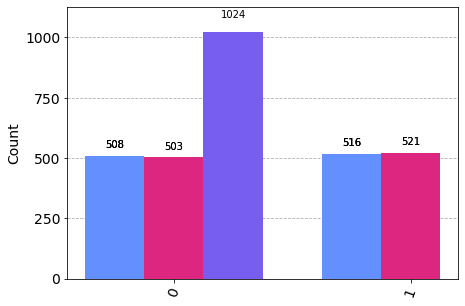

In [19]:
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]

plot_histogram(qubit_counts)

Third qubit of bob is always zero(100% of time. So we found zero in Bob's qubit everytime it is run in the simulator. The final state disentngleer is uncomputed and we got zero. Our teleportation circuit is worked.

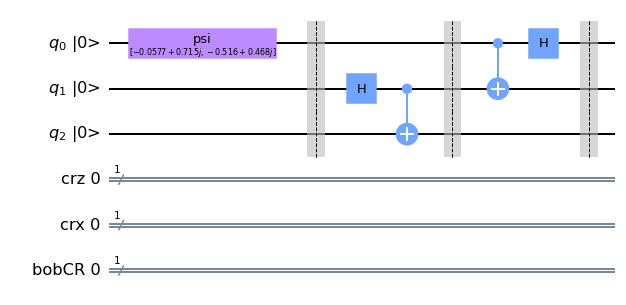

In [20]:
second_teleportation_circuit.draw(initial_state=True, output='mpl')

#Remove classical registers
#Have to do it from first except the crx and crz registers

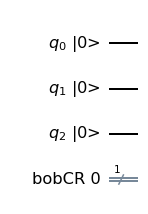

In [21]:
#Quantum Register

qr= QuantumRegister(3, name='q')


bobCR = ClassicalRegister(1, name='bobCR')

teleportation_circuit = QuantumCircuit(qr, bobCR)

teleportation_circuit.draw(initial_state=True, output='mpl')

#Create random state

<IPython.core.display.Latex object>

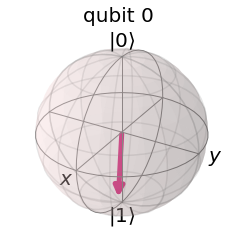

In [22]:
psi = random_statevector(2)

display(array_to_latex(psi))

init_gate = Initialize(psi)
init_gate.label = 'psi'

plot_bloch_multivector(psi)

#Assign to Alice Qubit

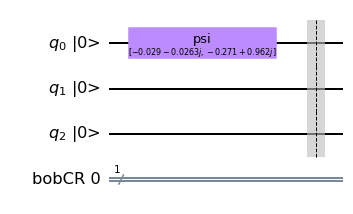

In [23]:
teleportation_circuit.append(init_gate, [0])

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')

#Entangled Pair

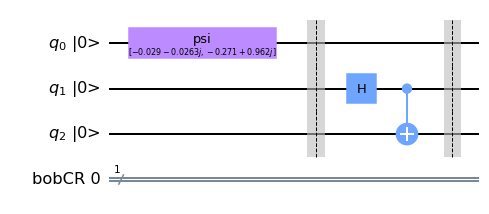

In [24]:
#Entangled Pair

teleportation_circuit.h(1)
teleportation_circuit.cx(1, 2)
teleportation_circuit.barrier()
teleportation_circuit.draw(initial_state=True, output='mpl')

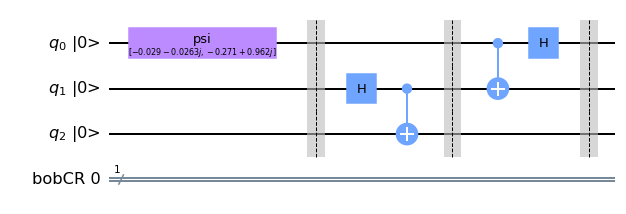

In [25]:
teleportation_circuit.cx(0, 1)

teleportation_circuit.h(0) 

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state = True, output='mpl')

#Create a copy

In [26]:
import copy

second_teleportation_circuit = copy.deepcopy(teleportation_circuit)

#Alice applies measurement

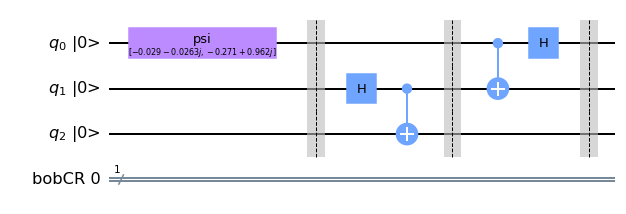

In [27]:
second_teleportation_circuit.draw(initial_state=True, output='mpl')


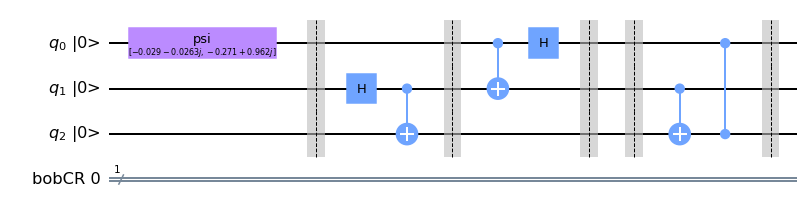

In [28]:
second_teleportation_circuit.barrier()

second_teleportation_circuit.cx(1, 2)

second_teleportation_circuit.cz(0, 2)

second_teleportation_circuit.barrier()

second_teleportation_circuit.draw(initial_state=True, output='mpl')

#Statevector Sample

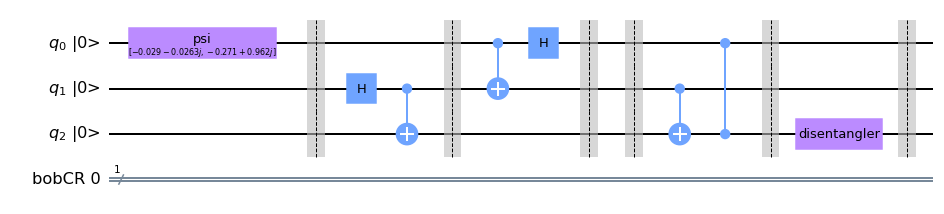

In [29]:
second_teleportation_circuit.append(inverse_init_gate, [2])

second_teleportation_circuit.barrier()

second_teleportation_circuit.draw(initial_state=True, output='mpl')

#Measere Bob qubit

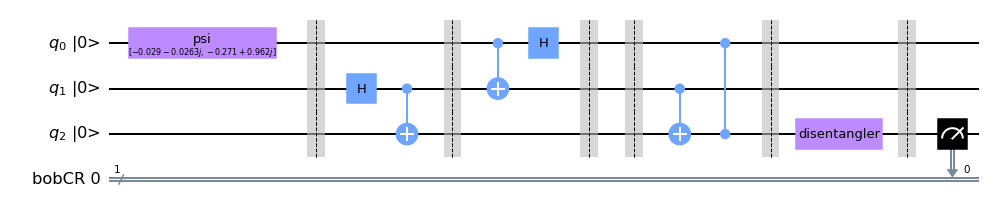

In [30]:
second_teleportation_circuit.measure(2, bobCR)
second_teleportation_circuit.draw(initial_state=True, output='mpl')


In [31]:
#get the least busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.save_account('2fb508208e14db369716764df552364ae1a91a6483ea34f6405b74d7805dc0732bdf899e3568959d8ef139e3af389bb82ed59d08caeeabb1e60dcab8e1a3d328')
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_quito')

backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits>= 3 and not b.configuration().simulator and b.status().operational==True))

print(backend)
t_qc = transpile(second_teleportation_circuit,backend,optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)

configrc.store_credentials:WARNING:2022-12-12 07:06:42,810: Credentials already present. Set overwrite=True to overwrite.


ibmq_belem
Job Status: job has successfully run


#Result

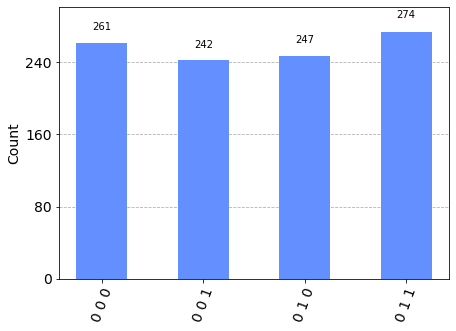

In [32]:
result = job.result()
count = result.get_counts(second_teleportation_circuit)
plot_histogram(counts)